pip install sentence-transformers transformers scikit-learn pandas matplotlib

In [3]:
import random
from datetime import datetime, timedelta
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from transformers import pipeline

/home/alexander-pool/anaconda3/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
import random
from datetime import datetime, timedelta

# Function to generate random dates within the past 3 years
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

start_date = datetime(2021, 1, 1)
end_date = datetime.now()

customer_questions_with_dates = [
    {"question": "What is the delivery time for international orders?", "date": random_date(start_date, end_date)},
    {"question": "Can I track my order once it's shipped?", "date": random_date(start_date, end_date)},
    {"question": "Do you offer free shipping for orders above a certain amount?", "date": random_date(start_date, end_date)},
    {"question": "What payment methods do you accept?", "date": random_date(start_date, end_date)},
    {"question": "How can I reset my password?", "date": random_date(start_date, end_date)},
    {"question": "Is the product available in different colors?", "date": random_date(start_date, end_date)},
    {"question": "Can I return an item after using it?", "date": random_date(start_date, end_date)},
    {"question": "What is the warranty on electronic items?", "date": random_date(start_date, end_date)},
    {"question": "Are the sizes true to the size chart?", "date": random_date(start_date, end_date)},
    {"question": "How can I check the status of my order?", "date": random_date(start_date, end_date)},
    {"question": "What should I do if my order arrives damaged?", "date": random_date(start_date, end_date)},
    {"question": "Can I change my shipping address after placing an order?", "date": random_date(start_date, end_date)},
    {"question": "How long does it take to process a refund?", "date": random_date(start_date, end_date)},
    {"question": "Do you have a physical store I can visit?", "date": random_date(start_date, end_date)},
    {"question": "How do I know if a product is in stock?", "date": random_date(start_date, end_date)},
    {"question": "Can I cancel my order before it ships?", "date": random_date(start_date, end_date)},
    {"question": "Do you offer gift wrapping?", "date": random_date(start_date, end_date)},
    {"question": "How do I apply a discount code to my order?", "date": random_date(start_date, end_date)},
    {"question": "Why was my payment declined?", "date": random_date(start_date, end_date)},
    {"question": "Can I get a price match for a lower price elsewhere?", "date": random_date(start_date, end_date)},
    {"question": "Do you ship to PO boxes?", "date": random_date(start_date, end_date)},
    {"question": "What are the shipping fees for express delivery?", "date": random_date(start_date, end_date)},
    {"question": "How can I update my billing information?", "date": random_date(start_date, end_date)},
    {"question": "Is there a loyalty program I can join?", "date": random_date(start_date, end_date)},
    {"question": "Do you offer student discounts?", "date": random_date(start_date, end_date)},
    {"question": "Can I combine multiple discount codes?", "date": random_date(start_date, end_date)},
    {"question": "What is your return policy?", "date": random_date(start_date, end_date)},
    {"question": "How do I exchange an item for a different size?", "date": random_date(start_date, end_date)},
    {"question": "Do you provide installation services for appliances?", "date": random_date(start_date, end_date)},
    {"question": "How can I contact customer service?", "date": random_date(start_date, end_date)},
    {"question": "Do you offer in-store pickup?", "date": random_date(start_date, end_date)},
    {"question": "Can I preorder upcoming products?", "date": random_date(start_date, end_date)},
    {"question": "Are there any warranties on furniture items?", "date": random_date(start_date, end_date)},
    {"question": "Can I pay with a gift card?", "date": random_date(start_date, end_date)},
    {"question": "How do I apply for a store credit card?", "date": random_date(start_date, end_date)},
    {"question": "Why is my tracking number not updating?", "date": random_date(start_date, end_date)},
    {"question": "Can I get expedited shipping?", "date": random_date(start_date, end_date)},
    {"question": "How do I leave a review for a product?", "date": random_date(start_date, end_date)},
    {"question": "Do you offer bulk purchase discounts?", "date": random_date(start_date, end_date)},
    {"question": "Why was my order split into multiple shipments?", "date": random_date(start_date, end_date)},
    {"question": "How do I unsubscribe from marketing emails?", "date": random_date(start_date, end_date)},
    {"question": "Can I track my return shipment?", "date": random_date(start_date, end_date)},
    {"question": "Why was there a delay in processing my refund?", "date": random_date(start_date, end_date)},
    {"question": "Can I ship to multiple addresses?", "date": random_date(start_date, end_date)},
    {"question": "What is the process for requesting a price adjustment?", "date": random_date(start_date, end_date)},
    {"question": "Can I receive alerts when a product is back in stock?", "date": random_date(start_date, end_date)},
    {"question": "Why was my order canceled without my permission?", "date": random_date(start_date, end_date)},
    {"question": "How do I report a defective product?", "date": random_date(start_date, end_date)},
    {"question": "Can I change my email address for my account?", "date": random_date(start_date, end_date)},
    {"question": "Is there a referral program for inviting friends?", "date": random_date(start_date, end_date)},
    {"question": "How do I delete my account?", "date": random_date(start_date, end_date)},
    {"question": "Do you offer same-day delivery?", "date": random_date(start_date, end_date)},
    {"question": "What is the cost of international shipping?", "date": random_date(start_date, end_date)},
    {"question": "How do I get a replacement for a lost package?", "date": random_date(start_date, end_date)},
    {"question": "Why is the price of the product higher than it was last week?", "date": random_date(start_date, end_date)},
    {"question": "Can I make changes to my order after it’s been placed?", "date": random_date(start_date, end_date)},
    {"question": "Why was my order delayed?", "date": random_date(start_date, end_date)},
    {"question": "Can I get free shipping with a minimum purchase?", "date": random_date(start_date, end_date)},
    {"question": "How do I reset my two-factor authentication?", "date": random_date(start_date, end_date)},
    {"question": "What do I do if I received the wrong item?", "date": random_date(start_date, end_date)},
    {"question": "Can I pay using PayPal?", "date": random_date(start_date, end_date)},
    {"question": "How do I apply for a refund if the product was faulty?", "date": random_date(start_date, end_date)},
]

# Print the first 5 for example purposes
for entry in customer_questions_with_dates[:5]:
    print(f"Question: {entry['question']}, Date: {entry['date'].strftime('%Y-%m-%d')}")


Question: What is the delivery time for international orders?, Date: 2023-01-31
Question: Can I track my order once it's shipped?, Date: 2023-11-30
Question: Do you offer free shipping for orders above a certain amount?, Date: 2023-03-30
Question: What payment methods do you accept?, Date: 2021-05-07
Question: How can I reset my password?, Date: 2023-11-01


In [13]:
# Convert to DataFrame
df = pd.DataFrame(customer_questions_with_dates)
df['date'] = pd.to_datetime(df['date'])

# 2. Embedding the Questions using SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Lightweight embedding model
questions = df['question'].tolist()
embeddings = model.encode(questions)

# 3. Clustering the Questions using KMeans
num_clusters = 4  # Adjust number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings)

# Print sample clusters
print("Sample Questions by Cluster:")
for i in range(num_clusters):
    print(f"\nCluster {i}:")
    print(df[df['cluster'] == i]['question'].sample(3).tolist())

Sample Questions by Cluster:

Cluster 0:
['Can I pay with a gift card?', 'Is there a loyalty program I can join?', 'How can I contact customer service?']

Cluster 1:
['Can I make changes to my order after it’s been placed?', 'How do I know if a product is in stock?', 'Why is my tracking number not updating?']

Cluster 2:
['Do you offer bulk purchase discounts?', 'Can I get free shipping with a minimum purchase?', 'Do you offer gift wrapping?']

Cluster 3:
['Can I get expedited shipping?', 'How do I exchange an item for a different size?', 'What is the cost of international shipping?']


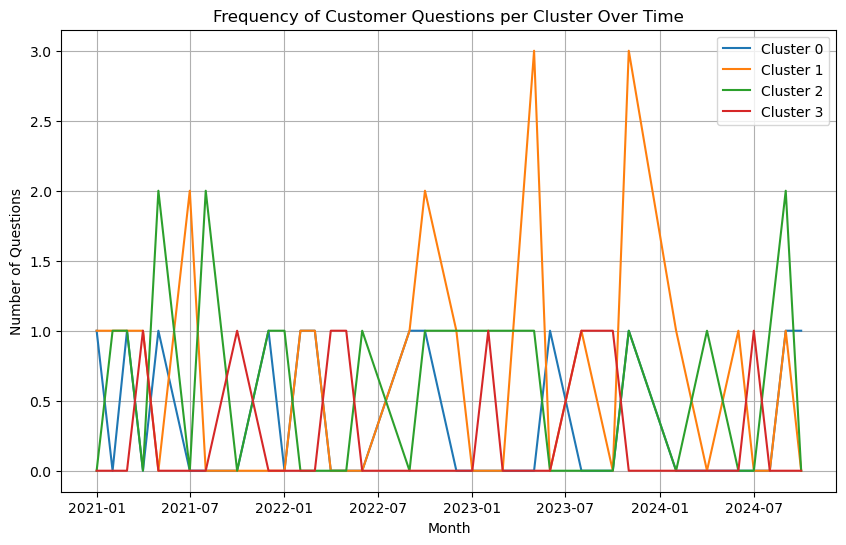

In [17]:
# 4. Time-Series Analysis: Frequency of Questions per Cluster Over Time
df['month'] = df['date'].dt.to_period('M')
time_series_data = df.groupby(['month', 'cluster']).size().unstack().fillna(0)

# Plotting the time-series trends for each cluster
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.plot(time_series_data.index.to_timestamp(), time_series_data[cluster], label=f'Cluster {cluster}')
plt.legend()
plt.title('Frequency of Customer Questions per Cluster Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.grid(True)
plt.show()



In [23]:
# Summarizing the most common questions per cluster
# 5. Text Summarization for Each Cluster Using LLM
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
cluster_summaries = {}
for i in range(num_clusters):
    cluster_questions = df[df['cluster'] == i]['question'].tolist()
    cluster_text = " ".join(cluster_questions[:5])  # Concatenate the top 5 questions for summarization
    summary = summarizer(cluster_text, max_length=500, min_length=30, do_sample=False)
    cluster_summaries[i] = summary[0]['summary_text']
    print(f"Cluster {i} Summary: {cluster_summaries[i]}")

# 6. Augmenting LLM Suggestions with Clustering and Time-Series Data
# Mock LLM model for generating suggestions
suggestion_generator = pipeline("text-generation", model="meta-llama/Llama-3.2-1B-Instruct")

# Function to augment suggestions with cluster summaries and time-series insights
def suggest_enhancements(query, cluster_summaries, time_series_data):
    # Generate a prompt for the LLM including cluster summaries and time trends
    prompt = (
        f"Based on the following customer feedback themes: {cluster_summaries}\n"
        f"Here are the time trends for the issues: {time_series_data.describe()}\n"
        "Please suggest improvements for the eCommerce website to address these issues."
    )

    # Generate suggestions using the LLM
    response = suggestion_generator(prompt, max_length=1000)[0]['generated_text']
    return response

# Example Usage
sample_query = "checkout issues"
time_series_summary = time_series_data.describe()
augmented_suggestion = suggest_enhancements(sample_query, cluster_summaries, time_series_summary)
print("LLM Suggestion:", augmented_suggestion)


Your max_length is set to 500, but your input_length is only 40. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)
Your max_length is set to 500, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


Cluster 0 Summary: How can I reset my password? Is there a loyalty program I can join? Can I combine multiple discount codes? How can I contact customer service? can I pay with a gift card?


Your max_length is set to 500, but your input_length is only 46. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


Cluster 1 Summary: Can I return an item after using it? How can I check the status of my order? What should I do if my order arrives damaged? How long does it take to process a refund?


Your max_length is set to 500, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)


Cluster 2 Summary: Do you offer free shipping for orders above a certain amount? What payment methods do you accept? Is the product available in different colors? What is the warranty on electronic items?
Cluster 3 Summary: Can I change my shipping address after placing an order? Do you ship to PO boxes? What are the shipping fees for express delivery? How do I exchange an item for a different size? Can I get expedited shipping?


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


LLM Suggestion: Based on the following customer feedback themes: {0: 'How can I reset my password? Is there a loyalty program I can join? Can I combine multiple discount codes? How can I contact customer service? can I pay with a gift card?', 1: 'Can I return an item after using it? How can I check the status of my order? What should I do if my order arrives damaged? How long does it take to process a refund?', 2: 'Do you offer free shipping for orders above a certain amount? What payment methods do you accept? Is the product available in different colors? What is the warranty on electronic items?', 3: 'Can I change my shipping address after placing an order? Do you ship to PO boxes? What are the shipping fees for express delivery? How do I exchange an item for a different size? Can I get expedited shipping?'}
Here are the time trends for the issues: cluster          0          1          2          3
count     8.000000   8.000000   8.000000   8.000000
mean      4.481518   4.815072   4